In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')


In [3]:
try:
   
    df = pd.read_csv('C:/Users/Akash/OneDrive - Erin.N.Nagarvala Day School/Desktop/jupyter notebook/Unemployment in India.csv', encoding='latin1')
    print("Dataset loaded successfully!")
except FileNotFoundError:
    print("Error: 'Unemployment in India.csv' not found. Please ensure the file is uploaded.")
    exit()

Dataset loaded successfully!


In [4]:
print("\n--- Original Dataset Head ---")
print(df.head())
print("\n--- Dataset Info ---")
df.info()
print("\n--- Missing Values Before Preprocessing ---")
print(df.isnull().sum())
print(f"\nTotal rows before dropping NaNs: {df.shape[0]}")



--- Original Dataset Head ---
        ï»¿Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0  Andhra Pradesh   31-05-2019    Monthly                              3.65   
1  Andhra Pradesh   30-06-2019    Monthly                              3.05   
2  Andhra Pradesh   31-07-2019    Monthly                              3.75   
3  Andhra Pradesh   31-08-2019    Monthly                              3.32   
4  Andhra Pradesh   30-09-2019    Monthly                              5.17   

    Estimated Employed   Estimated Labour Participation Rate (%)   Area  
0           11999139.0                                     43.24  Rural  
1           11755881.0                                     42.05  Rural  
2           12086707.0                                     43.50  Rural  
3           12285693.0                                     43.97  Rural  
4           12256762.0                                     44.68  Rural  

--- Dataset Info ---
<class 'pandas.core.frame.Da

In [5]:
df.columns = [
    'Region', 'Date', 'Frequency', 'Estimated Unemployment Rate (%)',
    'Estimated Employed', 'Estimated Labour Participation Rate (%)', 'Area'
]

In [6]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)


In [7]:
numerical_cols = [
    'Estimated Unemployment Rate (%)', 'Estimated Employed',
    'Estimated Labour Participation Rate (%)'
]
for col in numerical_cols:
    # Coerce errors will turn invalid parsing into NaN, which we handle next
    df[col] = pd.to_numeric(df[col], errors='coerce')


In [8]:
df.dropna(inplace=True)
print(f"\nTotal rows after dropping NaNs: {df.shape[0]}")
print("\n--- Missing Values After Preprocessing ---")
print(df.isnull().sum())

print("\n--- Cleaned Dataset Head ---")
print(df.head())
print("\n--- Cleaned Dataset Info ---")
df.info()


Total rows after dropping NaNs: 740

--- Missing Values After Preprocessing ---
Region                                     0
Date                                       0
Frequency                                  0
Estimated Unemployment Rate (%)            0
Estimated Employed                         0
Estimated Labour Participation Rate (%)    0
Area                                       0
dtype: int64

--- Cleaned Dataset Head ---
           Region       Date Frequency  Estimated Unemployment Rate (%)  \
0  Andhra Pradesh 2019-05-31   Monthly                             3.65   
1  Andhra Pradesh 2019-06-30   Monthly                             3.05   
2  Andhra Pradesh 2019-07-31   Monthly                             3.75   
3  Andhra Pradesh 2019-08-31   Monthly                             3.32   
4  Andhra Pradesh 2019-09-30   Monthly                             5.17   

   Estimated Employed  Estimated Labour Participation Rate (%)   Area  
0          11999139.0                 


--- A. Overall Unemployment Rate Trend ---


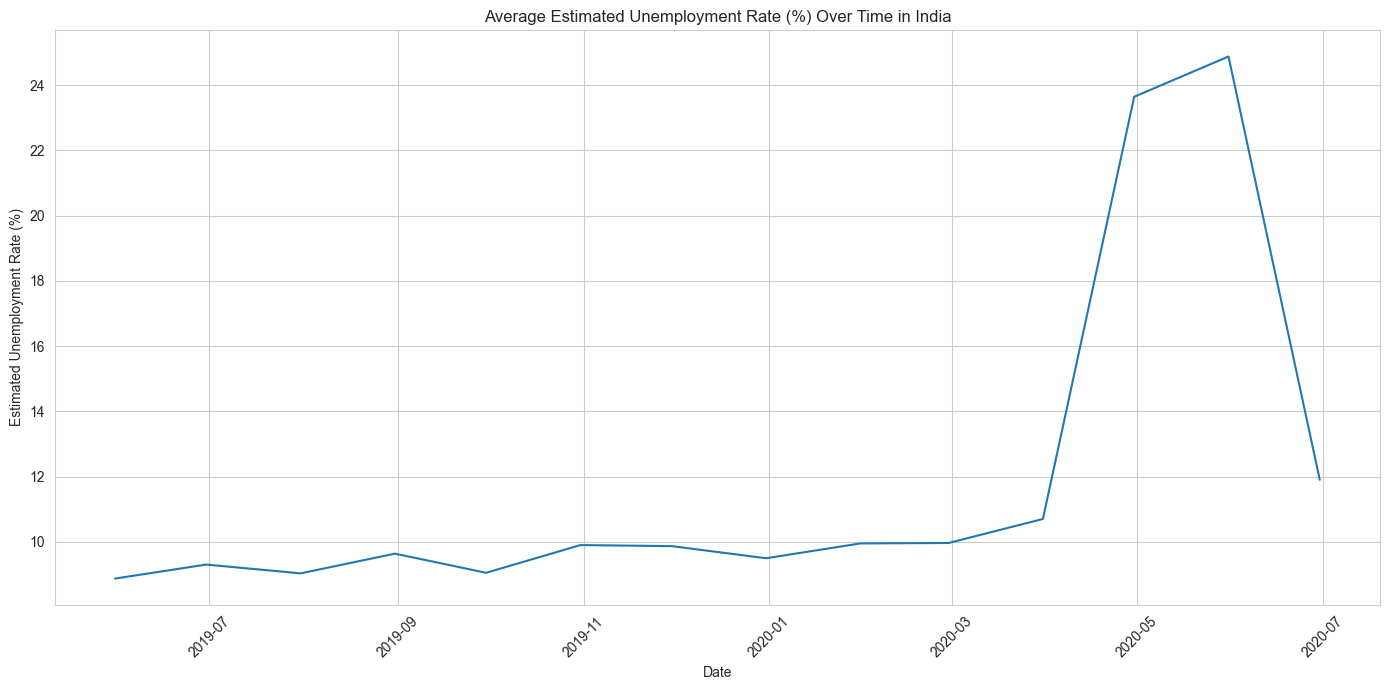

In [9]:
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

print("\n--- A. Overall Unemployment Rate Trend ---")
plt.figure(figsize=(14, 7))
sns.lineplot(data=df, x='Date', y='Estimated Unemployment Rate (%)', estimator='mean', errorbar=None)
plt.title('Average Estimated Unemployment Rate (%) Over Time in India')
plt.xlabel('Date')
plt.ylabel('Estimated Unemployment Rate (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


--- B. Unemployment Rate by Region ---


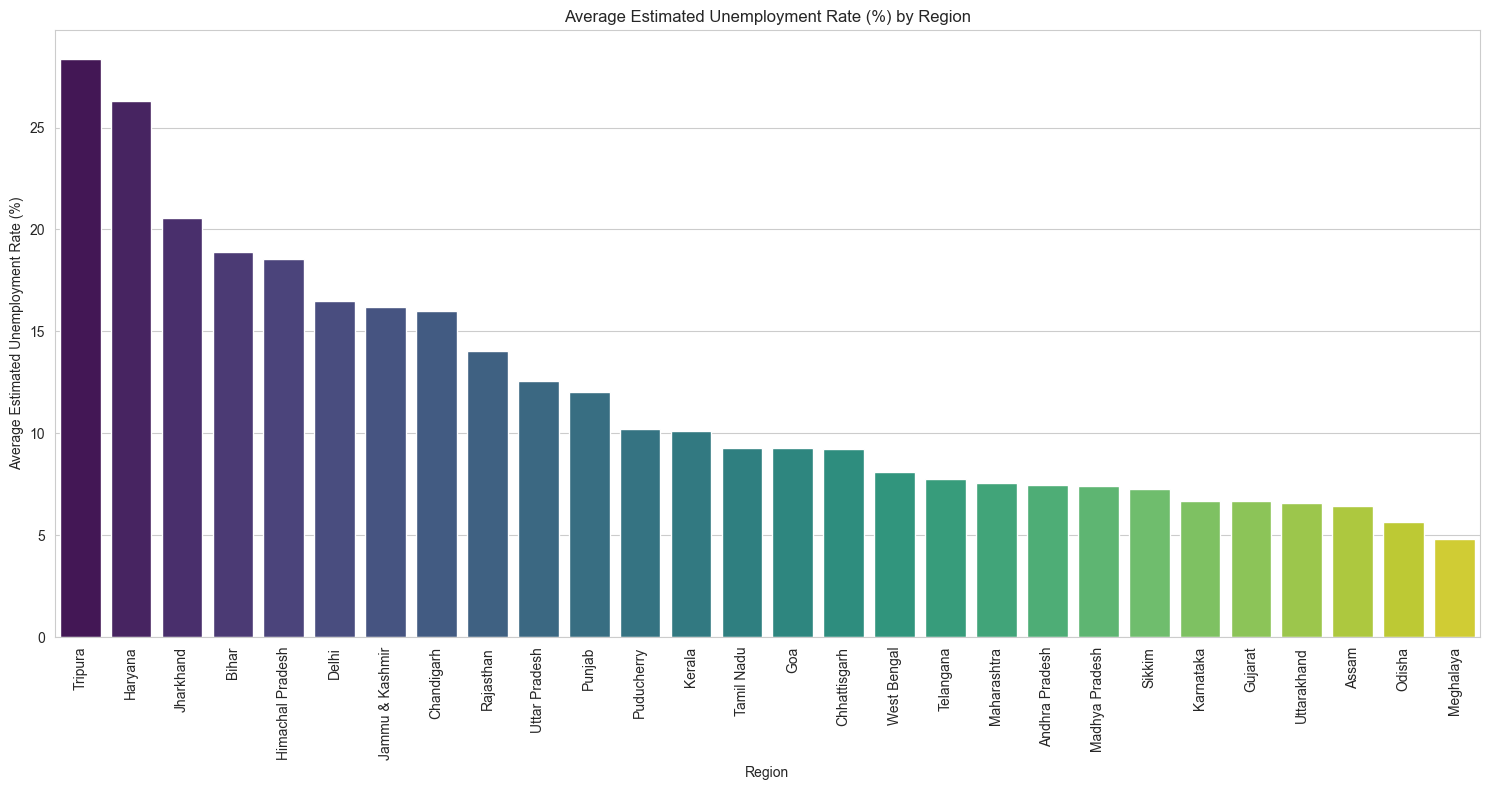

In [10]:
print("\n--- B. Unemployment Rate by Region ---")
plt.figure(figsize=(15, 8))
sns.barplot(
    data=df.groupby('Region')['Estimated Unemployment Rate (%)'].mean().sort_values(ascending=False).reset_index(),
    x='Region',
    y='Estimated Unemployment Rate (%)',
    palette='viridis'
)
plt.title('Average Estimated Unemployment Rate (%) by Region')
plt.xlabel('Region')
plt.ylabel('Average Estimated Unemployment Rate (%)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


--- C. Unemployment Rate by Area ---


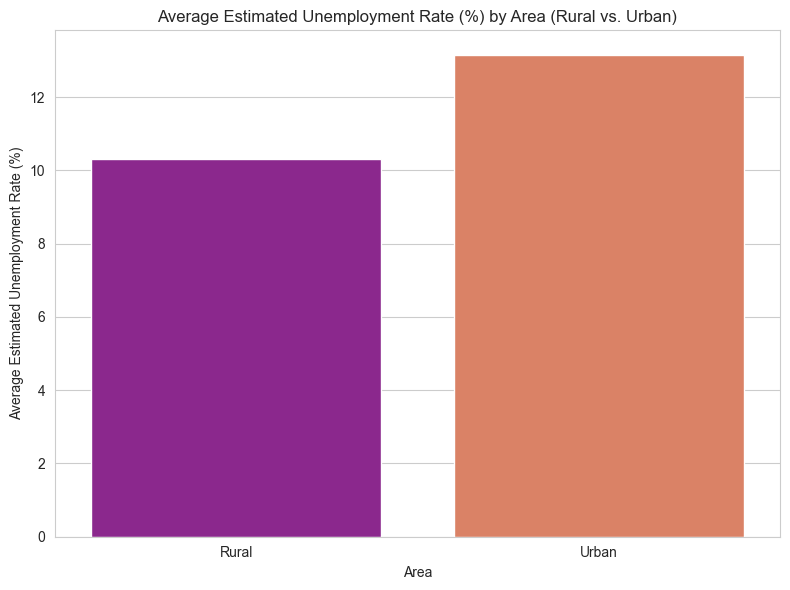

In [11]:
print("\n--- C. Unemployment Rate by Area ---")
plt.figure(figsize=(8, 6))
sns.barplot(
    data=df.groupby('Area')['Estimated Unemployment Rate (%)'].mean().reset_index(),
    x='Area',
    y='Estimated Unemployment Rate (%)',
    palette='plasma'
)
plt.title('Average Estimated Unemployment Rate (%) by Area (Rural vs. Urban)')
plt.xlabel('Area')
plt.ylabel('Average Estimated Unemployment Rate (%)')
plt.tight_layout()
plt.show()


--- D. Trend of Unemployment Rate by Area Over Time ---


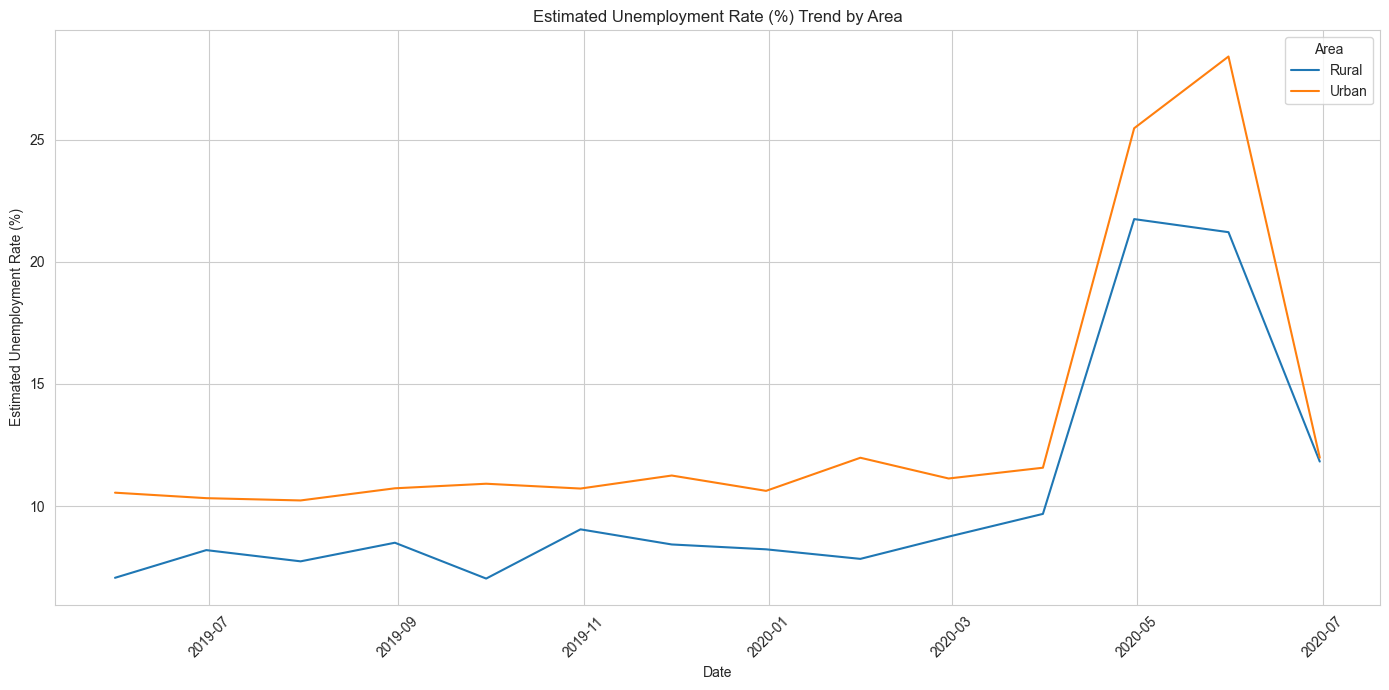

In [12]:
print("\n--- D. Trend of Unemployment Rate by Area Over Time ---")
plt.figure(figsize=(14, 7))
sns.lineplot(data=df, x='Date', y='Estimated Unemployment Rate (%)', hue='Area', estimator='mean', errorbar=None)
plt.title('Estimated Unemployment Rate (%) Trend by Area')
plt.xlabel('Date')
plt.ylabel('Estimated Unemployment Rate (%)')
plt.xticks(rotation=45)
plt.legend(title='Area')
plt.tight_layout()
plt.show()


---E. Focus on COVID-19 Impact Period ---


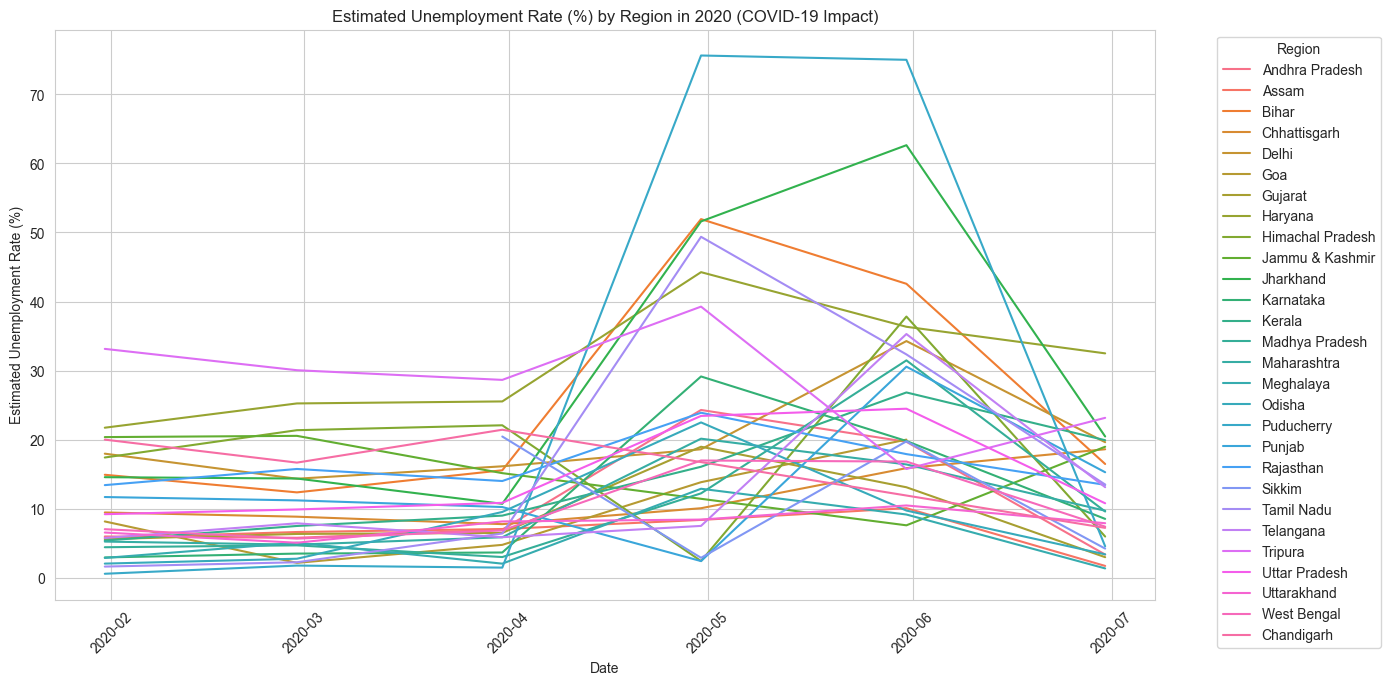

In [20]:
print("\n---E. Focus on COVID-19 Impact Period ---")
df_2020 = df[(df['Date'].dt.year == 2020)]

if not df_2020.empty:
    plt.figure(figsize=(14, 7))
    sns.lineplot(data=df_2020, x='Date', y='Estimated Unemployment Rate (%)', hue='Region', estimator='mean', errorbar=None)
    plt.title('Estimated Unemployment Rate (%) by Region in 2020 (COVID-19 Impact)')
    plt.xlabel('Date')
    plt.ylabel('Estimated Unemployment Rate (%)')
    plt.xticks(rotation=45)
    plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

In [18]:
pre_covid_df = df[(df['Date'] < '2020-03-01')]
covid_peak_df = df[(df['Date'] >= '2020-04-01') & (df['Date'] <= '2020-05-31')]

if not pre_covid_df.empty:
    pre_covid_unemp_rate = pre_covid_df['Estimated Unemployment Rate (%)'].mean()
    print(f"\nAverage Unemployment Rate (Before March 2020): {pre_covid_unemp_rate:.2f}%")
else:
    print("\nNo data available before March 2020 for pre-COVID analysis.")

if not covid_peak_df.empty:
    covid_peak_unemp_rate = covid_peak_df['Estimated Unemployment Rate (%)'].mean()
    print(f"Average Unemployment Rate (April-May 2020): {covid_peak_unemp_rate:.2f}%")
    if not pre_covid_df.empty:
        print(f"Increase during COVID peak: {(covid_peak_unemp_rate - pre_covid_unemp_rate):.2f} percentage points.")
    else:
        print("No data available for April-May 2020 for COVID peak analysis.")

else:
    print("\nNo data for the year 2020 to analyze COVID-19 impact specifically.")



Average Unemployment Rate (Before March 2020): 9.51%
Average Unemployment Rate (April-May 2020): 24.26%
Increase during COVID peak: 14.75 percentage points.



--- F. Distribution of Estimated Employed and Labour Participation Rate ---


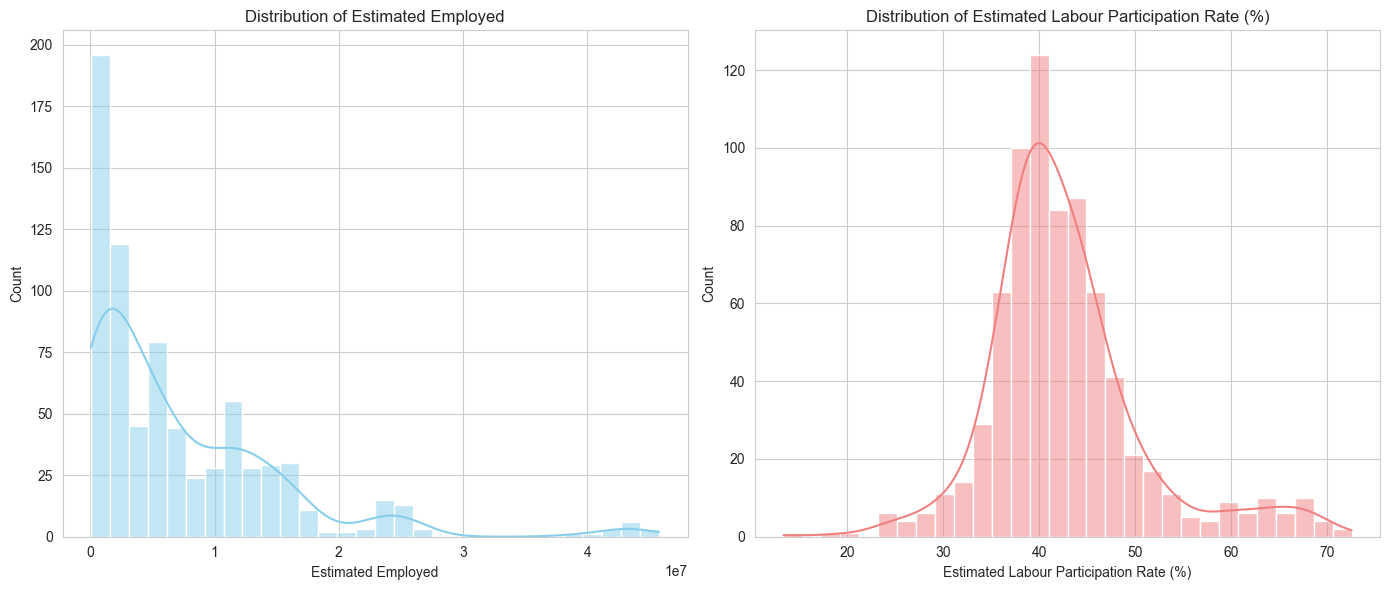

In [19]:
print("\n--- F. Distribution of Estimated Employed and Labour Participation Rate ---")
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['Estimated Employed'], kde=True, bins=30, color='skyblue')
plt.title('Distribution of Estimated Employed')
plt.xlabel('Estimated Employed')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
sns.histplot(df['Estimated Labour Participation Rate (%)'], kde=True, bins=30, color='lightcoral')
plt.title('Distribution of Estimated Labour Participation Rate (%)')
plt.xlabel('Estimated Labour Participation Rate (%)')
plt.ylabel('Count')

plt.tight_layout()
plt.show()